
📈 Running GA and XGBoost for: JNJ
Generation 1
Generation 2
Generation 3
Generation 4
❌ Error processing JNJ: Alpha Vantage price error: {'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.'}

📈 Running GA and XGBoost for: NVDA
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
❌ Error processing NVDA: Expecting value: line 1 column 1 (char 0)

📈 Running GA and X

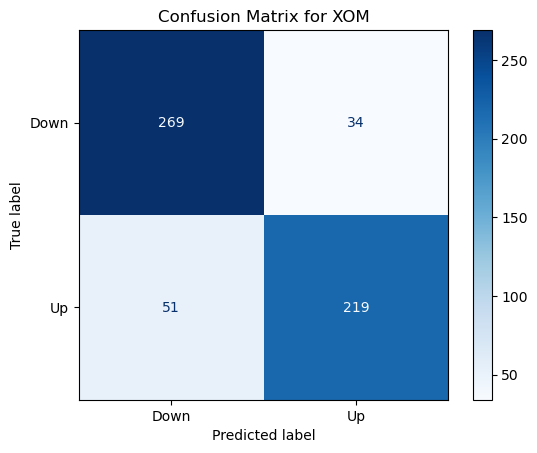

📊 Final Metrics for XOM: {'accuracy': 0.8356020942408376, 'precision': 0.8407091182678833, 'recall': 0.8279391285262985, 'f1_score': 0.8338445746779746, 'roc_auc': 0.9207499518994474}

📈 Running GA and XGBoost for: AMZN
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
✅ Best features for AMZN: ['NATR', 'HT_DCPHASE', 'APO', 'STOCH_fastd', 'CMO', 'MIDPOINT',

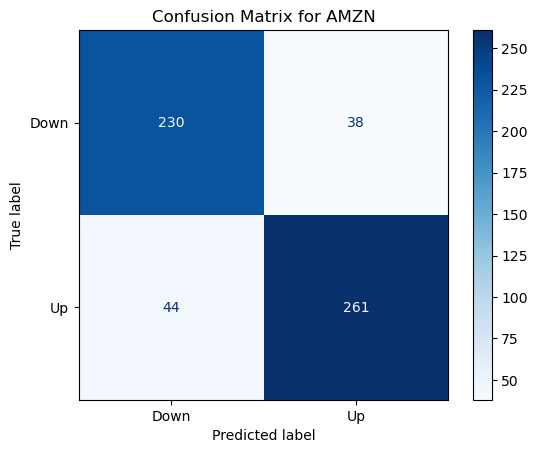

📊 Final Metrics for AMZN: {'accuracy': 0.8390924956369983, 'precision': 0.8432757165339423, 'recall': 0.8576480272736244, 'f1_score': 0.8500812084495057, 'roc_auc': 0.9208063436700759}

📈 Running GA and XGBoost for: NKE
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
✅ Best features for NKE: ['NATR', 'HT_DCPHASE', 'APO', 'CMO', 'HT_TRENDMODE', 'STOCH_fast

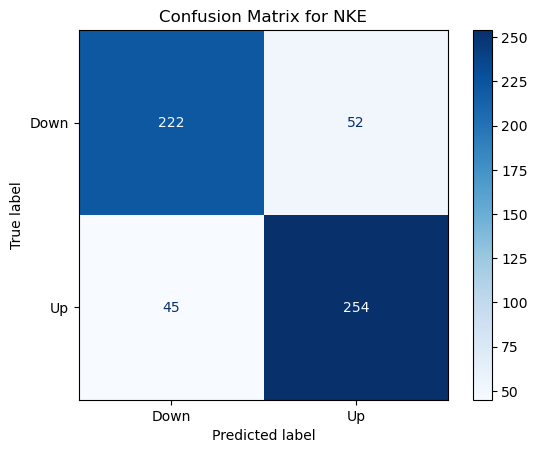

📊 Final Metrics for NKE: {'accuracy': 0.8352530541012216, 'precision': 0.8501978911780093, 'recall': 0.8291660548042141, 'f1_score': 0.8392686252926358, 'roc_auc': 0.915409626679358}

📈 Running GA and XGBoost for: LMT
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
✅ Best features for LMT: ['NATR', 'STOCH_fastd', 'MOM', 'HT_PHASOR_quadrature', 'MFI', 'RSI

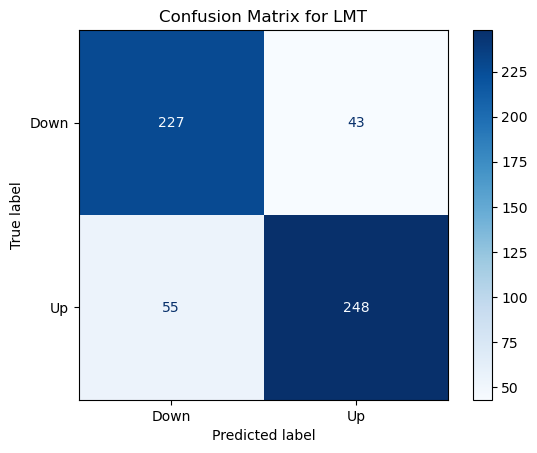

📊 Final Metrics for LMT: {'accuracy': 0.8265270506108202, 'precision': 0.8403545448139574, 'recall': 0.8374679213391664, 'f1_score': 0.8387983036438997, 'roc_auc': 0.9097160361272488}


In [1]:
from genetic_algorithm import genetic_algorithm
from train_boost import train_xgboost

# Define parameters
tickers = ['JNJ', 'NVDA', 'JPM', 'XOM']
start_date = '2008-01-01'
end_date = '2021-12-31'
all_features = [
    'BB_upper', 'BB_middle', 'BB_lower', 'DEMA', 'MIDPOINT', 'MIDPRICE', 'SMA', 'T3',
    'TEMA', 'TRIMA', 'WMA', 'ADX', 'ADXR', 'APO', 'AROON_DOWN', 'AROON_UP', 'AROONOSC',
    'CCI', 'CMO', 'MACD', 'MACD_signal', 'MACD_hist', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM',
    'PLUS_DI', 'PLUS_DM', 'ROC', 'RSI', 'STOCH_slowk', 'STOCH_slowd', 'STOCH_fastk',
    'STOCH_fastd', 'ATR', 'NATR', 'TRANGE', 'AD', 'ADOSC', 'OBV', 'AVGPRICE', 'MEDPRICE',
    'TYPPRICE', 'WCLPRICE', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature', 'HT_SINE', 'HT_LEADSINE', 'HT_TRENDMODE'
]

# XGBoost parameters
xgb_params = {
    'learning_rate': 0.05,
    'n_estimators': 150,
    'max_depth': 4
}

# Run loop over each ticker
for ticker in tickers:
    print(f"\n📈 Running GA and XGBoost for: {ticker}")

    try:
        # Step 1: Run Genetic Algorithm to find best features
        best_features = genetic_algorithm(ticker, start_date, end_date, all_features)
        print(f"✅ Best features for {ticker}: {best_features}")

        # Step 2: Train XGBoost using selected features
        final_metrics, _ = train_xgboost(
            ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            feature_subset=best_features,
            params=xgb_params,
            save_model=True
        )

        # Step 3: Display only relevant metrics
        parsed_metrics = {
            key: final_metrics[key]
            for key in ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
        }
        print(f"📊 Final Metrics for {ticker}: {parsed_metrics}")

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
